In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Question 1:
init_guess = 1.9

def relaxation_iteration(c, tol=1e-6, max_iter=1000):
    x_old = init_guess
    for n in range(1, max_iter + 1):
        x_new = 1 - math.exp(-c * x_old)
        if abs(x_new - x_old) < tol:
            return x_new, n
        x_old = x_new
    raise RuntimeError("Did not converge within max_iter")


def overrelaxation_iteration(c, omega, tol=1e-6, max_iter=1000):
    x_old = init_guess
    for n in range(1, max_iter + 1):
        x_new = (1 + omega)*(1 - math.exp(-c*x_old)) - omega*x_old
        if abs(x_new - x_old) < tol:
            return x_new, n
        x_old = x_new
    raise RuntimeError("Did not converge within max_iter")


c = 2

sol_b, it_b = relaxation_iteration(c)
print(f"(b) Simple iteration: solution = {sol_b:.6f}, iterations = {it_b}")

for omega in [-0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    sol_c, it_c = overrelaxation_iteration(c, omega)
    print(f"(c) Overrelaxation (ω={omega}): solution = {sol_c:.6f}, iterations = {it_c}")

(b) Simple iteration: solution = 0.796813, iterations = 15
(c) Overrelaxation (ω=-0.7): solution = 0.796816, iterations = 61
(c) Overrelaxation (ω=-0.6): solution = 0.796815, iterations = 45
(c) Overrelaxation (ω=-0.5): solution = 0.796814, iterations = 36
(c) Overrelaxation (ω=-0.4): solution = 0.796814, iterations = 29
(c) Overrelaxation (ω=-0.3): solution = 0.796813, iterations = 24
(c) Overrelaxation (ω=-0.2): solution = 0.796813, iterations = 21
(c) Overrelaxation (ω=-0.1): solution = 0.796813, iterations = 18
(c) Overrelaxation (ω=0): solution = 0.796813, iterations = 15
(c) Overrelaxation (ω=0.1): solution = 0.796812, iterations = 13
(c) Overrelaxation (ω=0.2): solution = 0.796812, iterations = 9
(c) Overrelaxation (ω=0.3): solution = 0.796812, iterations = 10
(c) Overrelaxation (ω=0.4): solution = 0.796812, iterations = 10
(c) Overrelaxation (ω=0.5): solution = 0.796812, iterations = 9
(c) Overrelaxation (ω=0.6): solution = 0.796812, iterations = 8
(c) Overrelaxation (ω=0.7): s

In [26]:
#Question 2:
def f(x):
    return 5*math.exp(-x) + x - 5

def binary_search(init, final, tol=1e-6, max_iter=1000):
    h, c, k_B = 6.62607015e-34, 299792458, 1.38e-23
    for n in range(1, max_iter + 1):
        mid = (init + final)/2
        if f(mid) == 0 or abs(f(mid)) < tol:
            b = h*c/(k_B*mid)
            return mid, n, b
            break
        if f(init)*f(mid) < 0:
            final = mid
        if f(mid)*f(final) < 0:
            init = mid
    raise RuntimeError("Did not converge within max_iter")

sol, n_times, const = binary_search(3, 6, tol=1e-6, max_iter=1000)
print(f"The soltion to f(x) is {sol}, iterations are {n_times}, and the displacement constant is {const}")

lam = 5.02e-7
T = const/lam
print(f"Temperature of Sun'surface is T = {T}K")

The soltion to f(x) is 4.965113639831543, iterations are 20, and the displacement constant is 0.0028991350935564375
Temperature of Sun'surface is T = 5775.169509076569K


In [2]:
df = np.loadtxt("smf_cosmos.dat")
df

array([[9.600000e+00, 6.871000e-03, 7.344450e-04],
       [9.800000e+00, 5.688000e-03, 6.548807e-04],
       [1.000000e+01, 5.491000e-03, 5.821939e-04],
       [1.020000e+01, 4.989000e-03, 5.676684e-04],
       [1.040000e+01, 4.780000e-03, 5.480215e-04],
       [1.060000e+01, 4.230000e-03, 5.651628e-04],
       [1.080000e+01, 3.651000e-03, 4.942570e-04],
       [1.100000e+01, 2.253000e-03, 3.711543e-04],
       [1.120000e+01, 1.117000e-03, 2.077894e-04],
       [1.140000e+01, 4.182000e-04, 9.457827e-05],
       [1.160000e+01, 8.365000e-05, 3.661759e-05],
       [1.180000e+01, 1.195000e-05, 1.058371e-05]])

In [2]:
# Q3

def numerical_gradient(func, params, h):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        p1 = params.copy()
        p2 = params.copy()
        p1[i] += h
        p2[i] -= h
        grad[i] = (func(p1) - func(p2)) / (2*h)
    return grad

def gradient_descent(func, init, h, lr, max_iter=5000, tol=1e-6):
    his = []
    for i in range(max_iter):
        grad = numerical_gradient(func, init, h)
        init -= lr * grad
        val = func(init)
        his.append(val.copy())
        if np.linalg.norm(grad) < tol:
            break
    his = np.array(his)
    return init, his

def function(p):
    x, y = p
    return (x-2)**2 + (y-2)**2

x and y: [1.99999966 2.00000034]


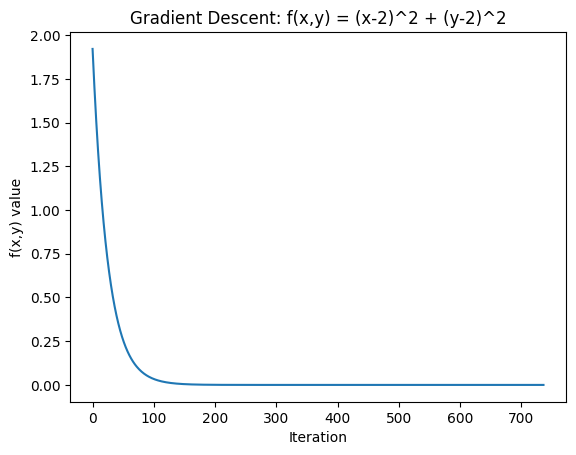

In [4]:
params0 = np.array([1.0, 3.0])
best_params, history = gradient_descent(function, params0, h = 1e-3, lr = 1e-2)
print("x and y:", best_params)
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("f(x,y) value")
plt.title("Gradient Descent: f(x,y) = (x-2)^2 + (y-2)^2")
# plt.legend()
plt.savefig("Gradient_Descent.png")
plt.show()

In [8]:
data = np.loadtxt("smf_cosmos.dat")  
data

array([[9.600000e+00, 6.871000e-03, 7.344450e-04],
       [9.800000e+00, 5.688000e-03, 6.548807e-04],
       [1.000000e+01, 5.491000e-03, 5.821939e-04],
       [1.020000e+01, 4.989000e-03, 5.676684e-04],
       [1.040000e+01, 4.780000e-03, 5.480215e-04],
       [1.060000e+01, 4.230000e-03, 5.651628e-04],
       [1.080000e+01, 3.651000e-03, 4.942570e-04],
       [1.100000e+01, 2.253000e-03, 3.711543e-04],
       [1.120000e+01, 1.117000e-03, 2.077894e-04],
       [1.140000e+01, 4.182000e-04, 9.457827e-05],
       [1.160000e+01, 8.365000e-05, 3.661759e-05],
       [1.180000e+01, 1.195000e-05, 1.058371e-05]])

Initial parameter guess (log10M*, alpha, log10phi*): [9.6, -2.0, -2.090901258255303]
Converged at iter 277, change in cost 1.46e-11

BEST FIT (converted):
log10(M*) = 10.97623, M* = 9.467e+10
alpha      = -1.00939
log10(phi*)= -2.56822, phi* = 2.703e-03


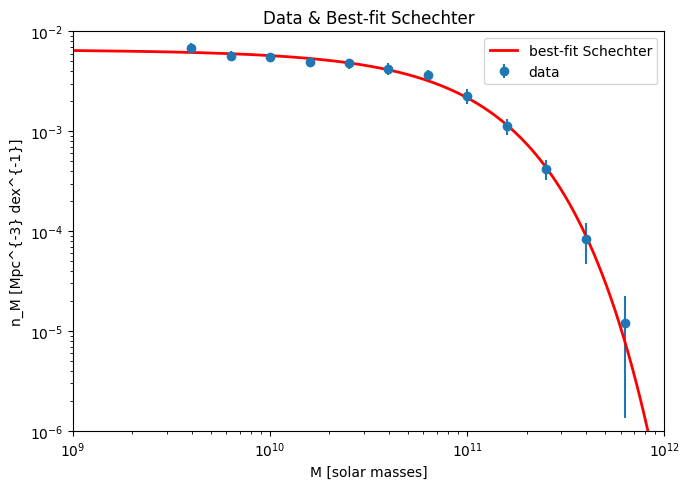

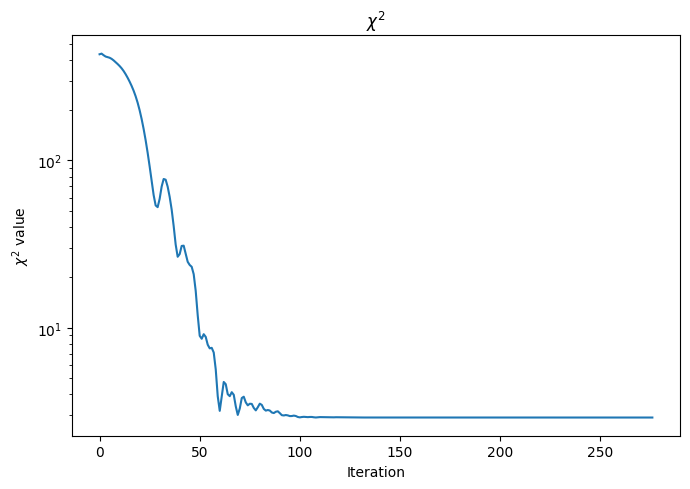

In [35]:
logM_data = data[:, 0]
n_M_data  = data[:, 1]
err_data   = data[:, 2]

M_data = 10.0**logM_data  

def schechter(M, log10Mstar, alpha, log10phistar):
    Mstar = 10.0**log10Mstar
    phistar = 10.0**log10phistar
    return phistar * (M / Mstar) ** (alpha + 1.0) * np.exp(-M / Mstar) * np.log(10.0)

def chi2(params):
    model = schechter(M_data, params[0], params[1], params[2])
    chi2 = np.sum(((n_M_data- model) / err_data) ** 2)
    return chi2

def numerical_gradient(f, params, rel_step=1e-6):
    params = np.array(params, dtype=float)
    grad = np.zeros_like(params)
    for i in range(len(params)):
        h = rel_step * max(1.0, abs(params[i]))
        p_plus = params.copy()
        p_minus = params.copy()
        p_plus[i] += h
        p_minus[i] -= h
        grad[i] = (f(p_plus) - f(p_minus)) / (2 * h)
    return grad

def fit_adam(f, init_params, lr=0.05, n_iter=4000, tol=1e-8, print_every=200, rel_step=1e-6):
    params = np.array(init_params, dtype=float)
    m = np.zeros_like(params)
    v = np.zeros_like(params)
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    history = []
    prev_cost = f(params)
    for t in range(1, n_iter + 1):
        g = numerical_gradient(f, params, rel_step)
        # gnorm = np.linalg.norm(g)

        # Adam updates
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g * g)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        params -= lr * m_hat / (np.sqrt(v_hat) + eps)

        cost = f(params)
        history.append(cost)

        if abs(prev_cost - cost) < tol:
            print(f"Converged at iter {t}, change in cost {abs(prev_cost - cost):.3g}")
            break
        prev_cost = cost

    return params, history


imax = np.argmax(n_M_data)
init_log10Mstar = logM_data[imax]
init_alpha = -2.0

n_M_peak = n_M_data[imax]
init_log10phistar = np.log10(max(n_M_peak / (np.log(10) * np.exp(-1.0)), 1e-12))

init_params = [init_log10Mstar, init_alpha, init_log10phistar]
print("Initial parameter guess (log10M*, alpha, log10phi*):", init_params)


best_params_log, history = fit_adam(chi2_reduced, init_params, lr=0.05, n_iter=8000, tol=1e-10, print_every=200, rel_step=1e-6)

best_log10Mstar, best_alpha, best_log10phistar = best_params_log
best_Mstar = 10.0 ** best_log10Mstar
best_phistar = 10.0 ** best_log10phistar

print("\nBEST FIT (converted):")
print(f"log10(M*) = {best_log10Mstar:.5f}, M* = {best_Mstar:.3e}")
print(f"alpha      = {best_alpha:.5f}")
print(f"log10(phi*)= {best_log10phistar:.5f}, phi* = {best_phistar:.3e}")


M_plot = np.logspace(np.min(logM_data)-1, np.max(logM_data)+1, 400)
phi_best = schechter(M_plot, best_log10Mstar, best_alpha, best_log10phistar)

plt.figure(figsize=(7,5))
plt.errorbar(M_data, n_M_data, yerr=err_data, fmt='o', label='data')
plt.plot(M_plot, phi_best, 'r-', lw=2, label='best-fit Schechter')
plt.xscale('log'); plt.yscale('log')
plt.xlim(10**9, 10**12)
plt.ylim(10**-6, 10**-2)
plt.xlabel('M [solar masses]')
plt.ylabel('n_M [Mpc^{-3} dex^{-1}]')
plt.legend()
plt.title('Data & Best-fit Schechter')
plt.tight_layout()
plt.savefig('Data & Best-fit Schechter.png')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history, '-')
plt.xlabel('Iteration')
plt.ylabel(r'$\chi^2$ value')
plt.title(r'$\chi^2$')
plt.yscale('log')
plt.tight_layout()
plt.savefig('chi^2.png')
plt.show()
